<a href="https://colab.research.google.com/github/AngelicaDC/Enzime-structure-analysis/blob/main/Analisis_grupos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
nom= ['alncris','aln','sc','s']
df=pd.DataFrame()
for tec in nom:
  locals()['df_'+tec]= pd.read_csv('/content/drive/MyDrive/Borradores Maestria/RESULTADOS_pruebas/prueba_'+tec+'/dfd_2'+tec+'.txt', sep='\t')
  #locals()['cn_'+tec]= (globals()['df_'+tec].groupby(by=['circuito','n'])['circuito'].count()).to_frame().rename(columns={'circuito': 'cuenta'}).reset_index()
  df=pd.concat([df,locals()['df_'+tec]])
df.reset_index(inplace=True, drop=True)
df['circuito'] = df['circuito'].astype('str')
df['n'] = df['n'].astype('str')
df['circuito_hebras'] = df[["circuito","n"]].apply("_".join, axis=1)

In [161]:
df.loc[df['tecnica']=="alncris","circuito_hebras"].value_counts()

1_8    606
0_8    147
0_7    120
0_5     30
0_6     29
1_7     12
0_3      9
0_4      6
Name: circuito_hebras, dtype: int64

In [162]:
df_bars1=df[["circuito_hebras","tecnica"]]#.set_index(["tecnica"])
#df_bars1= df_bars1.groupby(by=["tecnica","cn"])["count"].sum().reset_index()
df_bars1['circuito_hebras'].unique()

array(['0_8', '1_8', '0_7', '0_5', '0_6', '0_4', '1_7', '0_3', '0_10',
       '0_9', '0_11', '1_10', '1_9', '1_11', '0_12', '0_13', '1_12',
       '1_2'], dtype=object)

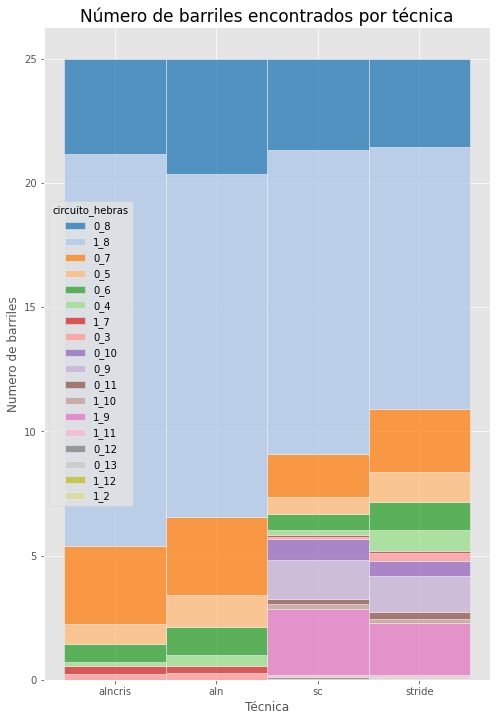

In [194]:
#sns.displot(data=df_bars1, x="tecnica", hue='cn',stat="count", ax=ax, multiple="stack",);
#sns.palplot(sns.color_palette("deep", 18))
with plt.style.context('ggplot'):
  fig = plt.figure(figsize=(8, 12))
  ax = fig.add_subplot()
  ax= sns.histplot(data=df_bars1, x="tecnica",hue='circuito_hebras', multiple="stack", palette="tab20",stat="percent",
                   )#hue_order=["1_12","1_11","1_10","1_9","1_8","1_7","1_2","0_13","0_12","0_11","0_10","0_9","0_8","0_7","0_6","0_5","0_4","0_3"]
  ax.set_title('Número de barriles encontrados por técnica', size=17)
  ax.set(ylabel='Numero de barriles', xlabel='Técnica')


Importar de nuevo el dataset pero ahora incluyendo a alncrisff y alnff

In [40]:
nom= ['alncris','aln','sc','s','alncrisff','alnff']
df=pd.DataFrame()
for tec in nom:
  locals()['df_'+tec]= pd.read_csv('/content/drive/MyDrive/Borradores Maestria/RESULTADOS_pruebas/prueba_'+tec+'/dfd_2'+tec+'.txt', sep='\t')
  #locals()['cn_'+tec]= (globals()['df_'+tec].groupby(by=['circuito','n'])['circuito'].count()).to_frame().rename(columns={'circuito': 'cuenta'}).reset_index()
  df=pd.concat([df,locals()['df_'+tec]])
df.reset_index(inplace=True, drop=True)
df['circuito'] = df['circuito'].astype('str')
df['n'] = df['n'].astype('str')
df['circuito_hebras'] = df[["circuito","n"]].apply("_".join, axis=1)

#### Barriles nuevos con alncrisff

In [5]:
alncris_18 = df_alncris[(df_alncris['circuito']==1) & (df_alncris['n']==8)]['barril']
alncrisff_18 = df_alncrisff[(df_alncrisff['circuito']==1) & (df_alncrisff['n']==8)]['barril']
aln_18 = df_aln[(df_aln['circuito']==1) & (df_aln['n']==8)]['barril']
alnff_18 = df_alnff[(df_alnff['circuito']==1) & (df_alnff['n']==8)]['barril']
len(alncrisff_18)

610

In [5]:
print(f'Hay {len(alncrisff_18[~alncrisff_18.isin(alncris_18)])} barriles que encontramos con alncrisff pero no alncris \n{alncrisff_18[~alncrisff_18.isin(alncris_18)]}\n\
Hay {len(alncris_18[~alncris_18.isin(alncrisff_18)])} barriles que enconramos con alncris pero no alncrisff\n\
Hay {len(alnff_18[~alnff_18.isin(aln_18)])} barriles que enconramos con alnff pero no aln\n\
Hay {len(aln_18[~aln_18.isin(alnff_18)])} barriles que enconramos con aln pero no alnff\n\
Hay {len(alnff_18[~alnff_18.isin(alncrisff_18)])} barriles que enconramos con alnff pero no alncrisff\n\
Hay {len(alncrisff_18[~alncrisff_18.isin(alnff_18)])} barriles que enconramos con alncrisff pero no alnff')
#Hay que revisar los cuatro barriles nuevos que se encontraron con alncrisff
#alnff no sirve de mucho ya que alncrisff tienen todo sus barriles y mas

Hay 4 barriles que encontramos con alncrisff pero no alncris 
108    1iv8A01
350    2i5gA00
396    2pajA02
492    3a24A02
Name: barril, dtype: object
Hay 0 barriles que enconramos con alncris pero no alncrisff
Hay 5 barriles que enconramos con alnff pero no aln
Hay 0 barriles que enconramos con aln pero no alnff
Hay 0 barriles que enconramos con alnff pero no alncrisff
Hay 75 barriles que enconramos con alncrisff pero no alnff


## Dataframes de barriles por tipo


In [6]:
tipos=["1_8","1_9","1_7","1_12","1_11","1_10","0_12","0_11","0_10","0_9","0_8","0_7","0_6","0_5","0_4","0_3"]
for tipo in tipos:
  locals()['df_'+tipo]= df.loc[df['circuito_hebras']==tipo]

#### Barriles con numero de herbas discordante
* El unico 1_2 encontrado con stride es 1_8 con alncris y aln.
* El unico 0_13 encontrado con sc y stride es 1_8 con alncris.
* De los tres 0_12, 1tv8B00	es abierto y el numero de hebras no es claro, con alncris le falta una hebra al menos;   
2nt0A01	es 1_8 con alncris y aln;  
3e38A01 es abierto y el numero de hebras no es claro y tampoco la forma del barril.
* El único 1_12 encontrado con sc y strice es 1_8 con alncris y aln.
* De los once 0_11, seis son 1_8.   
2anuA00 es abierto y el número de hebras no es claro, se parece a 3e38A01.  
1djxA02 es 1_8 con alncris le falta una hebra.   
2dskA00 es 1_8 es 1_8 con alncris 0_8 porque a una hebra le hacen falta residuos.   
3rf9B02 es abierto y el número de hebras no es claro.   
3e38A01 (lo mismo que con 0_12).
* De los dos 1_11 encontrados con sc y stride









In [43]:
df.loc[df['circuito_hebras']=="1_11"]#.groupby("barril").first()

,barril,tecnica,circuito,nraw,n,e,area,rmsd_ajuste,perim,alfa_prom,alfa_ds,rmsd,a_prom,a_ds,b_prom,b_ds,shear_McL,shear_proyec,R_McL,R_Murz,area_c,perim_c,twist_McL,angtw,angtw_ds,circuito_hebras
2041,1jvnA02,sc,1,14,11,0.899589,319.342842,2.013546,71.532454,47.074209,17.694511,1.114490,3.823377,0.074208,5.265413,0.090196,16.287334,0.788898,13.721009,13.721009,591.455367,86.211643,0.022116,32.689061,10.310110,1_11
2388,2xtkA00,sc,1,13,11,0.901398,260.110081,2.674068,64.713579,45.596598,20.259370,1.214411,3.796191,0.037674,5.190624,0.106928,15.357096,1.223476,13.165491,13.165491,544.532750,82.721221,0.022941,30.770085,11.337118,1_11
3000,1jvnA02,stride,1,14,11,0.899589,319.342842,2.013546,71.532454,47.074209,17.694511,1.114490,3.823377,0.074208,5.265413,0.090196,16.287334,0.788898,13.721009,13.721009,591.455367,86.211643,0.022116,32.689061,10.310110,1_11
3347,2xtkA00,stride,1,11,11,0.893094,264.687873,2.917203,64.598519,46.183938,19.892560,1.147233,3.796588,0.037879,5.192104,0.108648,15.678189,1.376171,13.309247,13.309247,556.489304,83.624463,0.022681,30.859448,12.656720,1_11


In [41]:
list(df.loc[df['circuito_hebras']=="0_11"].groupby("barril").first().index)
df[df['barril'].isin(list(df.loc[df['circuito_hebras']=="0_11"].groupby("barril").first().index))].sort_values(by="barril").tail(50)

,barril,tecnica,circuito,nraw,n,e,area,rmsd_ajuste,perim,alfa_prom,alfa_ds,rmsd,a_prom,a_ds,b_prom,b_ds,shear_McL,shear_proyec,R_McL,R_Murz,area_c,perim_c,twist_McL,angtw,angtw_ds,circuito_hebras
235,1vh7A00,alncris,1,8,8,0.586211,121.118725,0.286844,39.337392,35.866048,5.275816,1.062876,3.803318,0.005220,5.271952,0.101179,8.017205,4.358854,8.499791,8.499791,226.968901,53.405761,0.033813,26.891378,6.059179,1_8
4071,1vh7A00,alncris,1,8,8,0.586211,121.118725,0.286844,39.337392,35.866048,5.275816,1.062876,3.803318,0.005220,5.271952,0.101179,8.017205,4.358854,8.499791,8.499791,226.968901,53.405761,0.033813,26.891378,6.059179,1_8
4098,1xx1A00,alncris,1,8,8,0.569022,123.582414,0.341138,39.690719,37.542482,5.256683,1.032973,3.759143,0.014590,5.186913,0.095626,8.483152,4.876245,8.547123,8.547123,229.503733,53.703156,0.033820,28.258201,8.942548,1_8
1221,1xx1A00,aln,1,8,8,0.569022,123.582414,0.341138,39.690719,37.816098,5.283128,1.013293,3.761328,0.015688,5.202727,0.079787,8.588436,4.988283,8.604859,8.604859,232.614809,54.065922,0.033697,28.316305,8.479374,1_8
3139,1xx1A00,stride,0,11,11,0.706984,255.841144,3.847626,57.977433,49.699973,19.713743,0.993304,3.755760,0.016665,5.175809,0.089487,17.874967,3.751503,14.201944,14.201944,633.644199,89.233446,0.020762,31.765681,10.517905,0_11
262,1xx1A00,alncris,1,8,8,0.569022,123.582414,0.341138,39.690719,37.542482,5.256683,1.032973,3.759143,0.014590,5.186913,0.095626,8.483152,4.876245,8.547123,8.547123,229.503733,53.703156,0.033820,28.258201,8.942548,1_8
5057,1xx1A00,aln,1,8,8,0.569022,123.582414,0.341138,39.690719,37.816098,5.283128,1.013293,3.761328,0.015688,5.202727,0.079787,8.588436,4.988283,8.604859,8.604859,232.614809,54.065922,0.033697,28.316305,8.479374,1_8
2180,1xx1A00,sc,0,11,11,0.706984,255.841144,3.847626,57.977433,49.444704,20.302201,1.007617,3.754170,0.015363,5.164308,0.096573,17.682486,3.749349,14.096471,14.096471,624.267446,88.570741,0.020939,31.723423,10.802605,0_11
4126,2anuA00,alncris,0,7,6,0.767254,126.657262,0.776567,41.372624,42.659598,11.836786,1.258944,3.797897,0.013140,5.230476,0.126457,7.614299,2.808790,7.112495,7.112495,158.925586,44.689124,0.042351,41.272783,21.753339,0_6
3167,2anuA00,stride,0,11,11,0.910574,220.674269,1.622026,60.402440,48.331235,18.512635,0.981897,3.792012,0.018681,5.254020,0.079021,17.124957,0.569290,14.025504,14.025504,617.997666,88.124842,0.021370,34.205312,12.539829,0_11


In [14]:
df[df['barril']=='4j9jA00']

,barril,tecnica,circuito,nraw,n,e,area,rmsd_ajuste,perim,alfa_prom,alfa_ds,rmsd,a_prom,a_ds,b_prom,b_ds,shear_McL,shear_proyec,R_McL,R_Murz,area_c,perim_c,twist_McL,angtw,angtw_ds,circuito_hebras
847,4j9jA00,alncris,1,8,8,0.465256,123.334434,0.284516,39.478159,37.800034,8.145995,1.139009,3.798926,0.007904,5.240285,0.144921,8.559864,4.114485,8.665091,8.665091,235.882719,54.444372,0.033792,28.96412,4.588704,1_8
1806,4j9jA00,aln,1,8,8,0.465256,123.334434,0.284516,39.478159,37.800034,8.145995,1.139009,3.798926,0.007904,5.240285,0.144921,8.559864,4.114485,8.665091,8.665091,235.882719,54.444372,0.033792,28.96412,4.588704,1_8
2765,4j9jA00,sc,1,12,12,0.581250,585.807383,1.729446,86.482738,44.574232,16.665874,1.231238,3.800164,0.006958,5.288304,0.137621,16.452828,2.163247,14.341737,14.341737,646.179849,90.111794,0.021084,35.56171,10.595677,1_12
3724,4j9jA00,stride,1,12,12,0.581250,585.807383,1.729446,86.482738,44.574232,16.665874,1.231238,3.800164,0.006958,5.288304,0.137621,16.452828,2.163247,14.341737,14.341737,646.179849,90.111794,0.021084,35.56171,10.595677,1_12
4683,4j9jA00,alncris,1,8,8,0.465256,123.334434,0.284516,39.478159,37.800034,8.145995,1.139009,3.798926,0.007904,5.240285,0.144921,8.559864,4.114485,8.665091,8.665091,235.882719,54.444372,0.033792,28.96412,4.588704,1_8
5642,4j9jA00,aln,1,8,8,0.465256,123.334434,0.284516,39.478159,37.800034,8.145995,1.139009,3.798926,0.007904,5.240285,0.144921,8.559864,4.114485,8.665091,8.665091,235.882719,54.444372,0.033792,28.96412,4.588704,1_8


## Descripcion de algunos barriles

In [283]:
df_barril_desc=pd.DataFrame({'barril:''1tv8B00','Pareces nueva'}, columns=['barril','desc'])
df_barril_desc

,barril,desc


In [244]:
df_1_8.groupby("barril").first()

,tecnica,circuito,nraw,n,e,area,rmsd_ajuste,perim,alfa_prom,alfa_ds,rmsd,a_prom,a_ds,b_prom,b_ds,shear_McL,shear_proyec,R_McL,R_Murz,area_c,perim_c,twist_McL,angtw,angtw_ds,circuito_hebras
barril,,,,,,,,,,,,,,,,,,,,,,,,,
1a0cA00,alncris,1,8,8,0.821656,119.611355,0.260670,41.070757,38.213587,11.743714,1.105803,3.804157,0.007278,5.233930,0.099638,8.665694,4.020067,8.703539,8.703539,237.980640,54.685948,0.033810,30.052826,7.114144,1_8
1a3wA02,alncris,1,8,8,0.350654,121.090124,0.434760,39.039980,35.175785,10.625739,1.055893,3.799256,0.008554,5.138146,0.069556,7.625307,4.306424,8.213122,8.213122,211.917289,51.604566,0.034668,25.652855,5.161767,1_8
1a53A00,alncris,1,8,8,0.203293,117.544935,0.357133,38.436440,34.270369,8.478744,0.976213,3.798974,0.009561,5.240588,0.066208,7.519750,4.136397,8.285630,8.285630,215.675541,52.060146,0.033957,26.137985,6.786186,1_8
1a5aA00,sc,1,8,8,0.638432,137.708501,0.551738,42.133951,35.868183,7.391985,0.980059,3.910654,0.334466,5.128089,0.128964,7.584981,3.851074,8.268069,8.268069,214.762330,51.949813,0.035743,26.782753,9.261006,1_8
1a5kC02,alncris,1,8,8,0.767183,143.139741,0.693492,43.981373,45.274504,18.382924,1.191304,3.797641,0.007422,5.261005,0.072738,11.189387,3.719187,9.767980,9.767980,299.750130,61.374027,0.030937,32.494040,13.612916,1_8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5gjnA02,alncris,1,8,8,0.611778,120.653682,0.264067,39.339463,38.459546,16.747308,1.027256,3.788032,0.011281,5.152864,0.059435,8.643720,3.651292,8.597870,8.597870,232.237126,54.022012,0.034150,28.949777,7.797583,1_8
5irpA02,alncris,1,8,8,0.633172,136.179376,0.583730,41.876801,42.993320,15.158454,1.134387,3.807268,0.006745,5.249104,0.101277,10.282910,4.541784,9.376501,9.376501,276.204974,58.914294,0.032233,31.737077,5.794373,1_8
5lsmG00,alncris,1,8,8,0.574365,127.976166,0.356925,40.403631,34.881461,4.415432,0.961949,3.801972,0.009437,5.330614,0.115349,7.819362,4.349125,8.490149,8.490149,226.454279,53.345182,0.033436,26.254792,2.462324,1_8


In [237]:
df_18.groupby("barril").first()

,tecnica,circuito,nraw,n,e,area,rmsd_ajuste,perim,alfa_prom,alfa_ds,rmsd,a_prom,a_ds,b_prom,b_ds,shear_McL,shear_proyec,R_McL,R_Murz,area_c,perim_c,twist_McL,angtw,angtw_ds,circuito_hebras
barril,,,,,,,,,,,,,,,,,,,,,,,,,
1a0cA00,alncris,1,8,8,0.821656,119.611355,0.260670,41.070757,38.213587,11.743714,1.105803,3.804157,0.007278,5.233930,0.099638,8.665694,4.020067,8.703539,8.703539,237.980640,54.685948,0.033810,30.052826,7.114144,1_8
1a3wA02,alncris,1,8,8,0.350654,121.090124,0.434760,39.039980,35.175785,10.625739,1.055893,3.799256,0.008554,5.138146,0.069556,7.625307,4.306424,8.213122,8.213122,211.917289,51.604566,0.034668,25.652855,5.161767,1_8
1a53A00,alncris,1,8,8,0.203293,117.544935,0.357133,38.436440,34.270369,8.478744,0.976213,3.798974,0.009561,5.240588,0.066208,7.519750,4.136397,8.285630,8.285630,215.675541,52.060146,0.033957,26.137985,6.786186,1_8
1a5aA00,sc,1,8,8,0.638432,137.708501,0.551738,42.133951,35.868183,7.391985,0.980059,3.910654,0.334466,5.128089,0.128964,7.584981,3.851074,8.268069,8.268069,214.762330,51.949813,0.035743,26.782753,9.261006,1_8
1a5kC02,alncris,1,8,8,0.767183,143.139741,0.693492,43.981373,45.274504,18.382924,1.191304,3.797641,0.007422,5.261005,0.072738,11.189387,3.719187,9.767980,9.767980,299.750130,61.374027,0.030937,32.494040,13.612916,1_8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5gjnA02,alncris,1,8,8,0.611778,120.653682,0.264067,39.339463,38.459546,16.747308,1.027256,3.788032,0.011281,5.152864,0.059435,8.643720,3.651292,8.597870,8.597870,232.237126,54.022012,0.034150,28.949777,7.797583,1_8
5irpA02,alncris,1,8,8,0.633172,136.179376,0.583730,41.876801,42.993320,15.158454,1.134387,3.807268,0.006745,5.249104,0.101277,10.282910,4.541784,9.376501,9.376501,276.204974,58.914294,0.032233,31.737077,5.794373,1_8
5lsmG00,alncris,1,8,8,0.574365,127.976166,0.356925,40.403631,34.881461,4.415432,0.961949,3.801972,0.009437,5.330614,0.115349,7.819362,4.349125,8.490149,8.490149,226.454279,53.345182,0.033436,26.254792,2.462324,1_8
